#Santiago Herrera Guzmán - 
#CC. 1010157719

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import scipy.optimize as optimize
from scipy.interpolate import interp1d


# Examen parcial 1 (raizes y ~interpolacion)
* comience con el ejercicio más fácil
* Antes de enviar el archivo, $\textbf{reiniciar y ejecutar el kernel}$ para ver que el archivo se compila sin errores
* enviar el archivo jupyter sin anexos antes de las 10am del 29.07.2022 a mi dirección de correo electrónico: michal.hemmerling@udea.edu.co 

# Ejercicio I

Bajo ciertas condiciones, los dispositivos ópticos como los láseres pueden mostrar un comportamiento complejo en el perfil del rayo de luz.


<table><tr>
<td> <img src="nonlinear_behaviour.png" width="600" /> </td>
</tr></table>
 
Para un dispositivo óptico particular que consiste en un medio no lineal dentro de una cavidad óptica, esto sólo ocurre cuando la intensidad I se encuentra dentro de un cierto rango que está dado por la ecuación: 

$$f(x)=(x+1)^2 - c(x-1) < 0 $$

donde $x$ es la intensidad del campo eléctrico y $c$ es la fuerza de la absorción del 
medio no lineal. 

## 1. Cree una función llamada `f_cost` que reciba dos parámetros (x,c) y solo devuelva la función f(x) como se mencionó anteriormente.

In [2]:
# tu codigo:
def f_cost(x,c):
  
  valor = (x + 1)**2 - (c*(x-1))

  return valor 

## 2. Usando funcion `f_cost` haz un gráfico con seis curvas para a=5,10,15,20,25,30 y con x entre -10,30 (100 puntos)
* hacer que cada curva sea de un color diferente
* añadir etiquetas
* Para cual `c` esta funcion no tiene raices?

In [3]:
# tu codigo:
c = np.array([5, 10, 15, 20, 25, 30])
x = np.linspace(-10, 30, 100)

valores = [[],[],[],[],[],[]]


for count, i in enumerate(c):
 for j in x:
   valores[count] += [f_cost(j,i)]

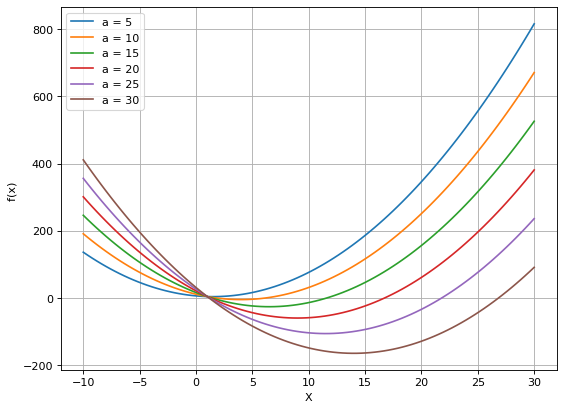

In [4]:
fig,ax=plt.subplots(figsize=(8, 6), dpi=80)

ax.plot(x,valores[0], label = 'a = 5')
ax.plot(x,valores[1], label = 'a = 10' )
ax.plot(x,valores[2], label = 'a = 15')
ax.plot(x,valores[3], label = 'a = 20')
ax.plot(x,valores[4], label = 'a = 25')
ax.plot(x,valores[5], label = 'a = 30')
ax.set_ylabel('f(x) ')
ax.set_xlabel('X')
ax.legend()
ax.grid()

Según la gráfica, la función no tiene raíz cuando a es igual a 5.

---

## 3. Usando los valores de 'c' para los cuales la función tiene raíces encontrar raíces izquierdas (Newton o Bisecion) y hacer una gráfica de esas raíces vs c. (preferiblemente use el bucle para encontrar todas las raíces) 

In [5]:
# tu codigo:
raiz_i = []

for i in range(len(c)-1):

  raiz_i += [optimize.bisect(f_cost, 0, 4, args=(c[i+1]))]

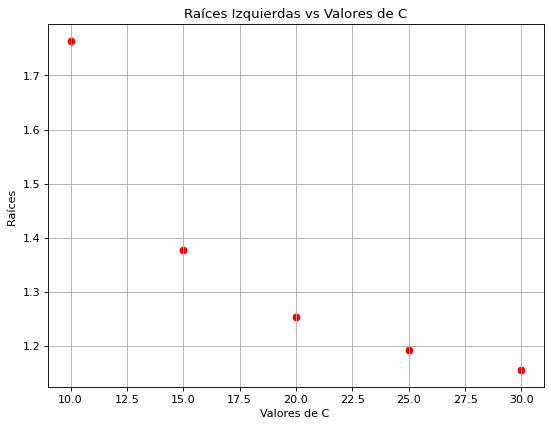

In [6]:
fig,ax=plt.subplots(figsize=(8, 6), dpi=80)

ax.scatter(c[1:6],raiz_i, label = 'Raíces', color= 'red')
ax.set_title('Raíces Izquierdas vs Valores de C')
ax.set_ylabel('Raíces ')
ax.set_xlabel('Valores de C ')

ax.grid()

## 4. Usando valores de 'c' para los cuales la función tiene raíces encontrar raíces derechas y hacer una gráfica de esas raíces vs c (preferiblemente use el bucle para encontrar todas las raíces)

In [7]:
# tu codigo:
raiz_d = []

for i in range(len(c)-1):

  raiz_d += [optimize.bisect(f_cost, 4, 30, args=(c[i+1]))]

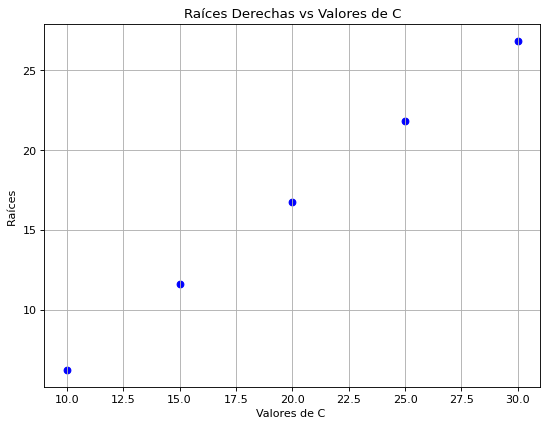

In [8]:
fig,ax=plt.subplots(figsize=(8, 6), dpi=80)

ax.scatter(c[1:6],raiz_d, label = 'Raíces', color= 'blue')
ax.set_title('Raíces Derechas vs Valores de C')
ax.set_ylabel('Raíces ')
ax.set_xlabel('Valores de C ')

ax.grid()

# Ejercicio II

Los datos para la presión frente a la temperatura de un gas cuantico se dan en el archivo csv ($ \textbf{data_pressure_vs_temperature.csv} $) https://github.com/mhemmg/datasets/tree/master/pressure_vs_temperature

* 1. importar los datos usando pandas
* 2. hacer un gráfico de $P$ vs $T$ (curva tiene que tener etiquieta)
* 3. interpolar los puntos (100 puntos) 
* 4. anadir curva a grafico anterior con datos interpolados de $P_{interp}$ vs $T_{interp}$ (curva tiene que tener etiquieta)
**graficos tienen que tener etiquietas**

In [9]:
### su codigos aqui
datos =pd.read_csv('data_pressure_vs_temparature.csv',index_col=False)

temp = datos['Temperature']
p = datos['Pressure']

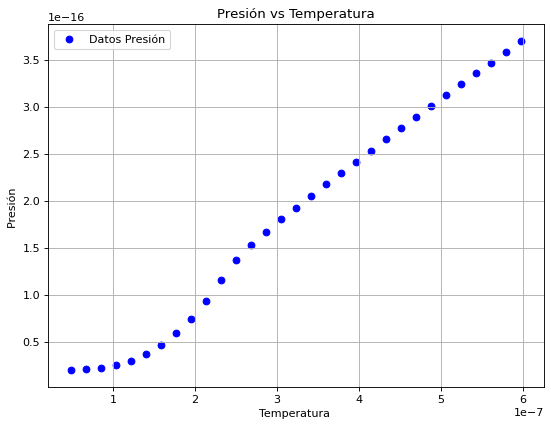

In [10]:
### su codigos aqui
fig,ax=plt.subplots(figsize=(8, 6), dpi=80)

ax.scatter(temp, p, label = 'Datos Presión', color= 'blue')
ax.set_title('Presión vs Temperatura')
ax.set_ylabel('Presión ')
ax.set_xlabel('Temperatura ')
ax.legend()
ax.grid()

In [11]:
### su codigos aqui

temp_int = np.linspace(min(temp),max(temp), 100)

p_int = interp1d(temp, p, kind='quadratic')


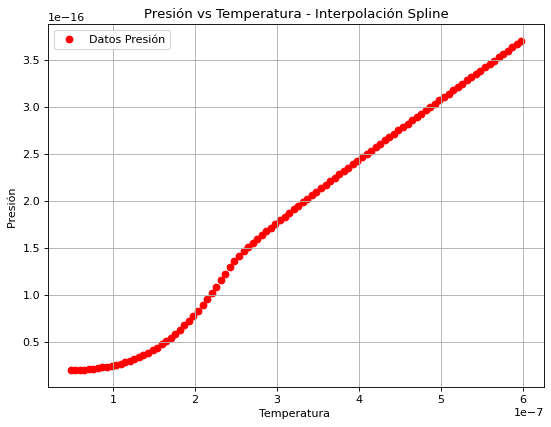

In [12]:
### su codigos aqui
fig,ax=plt.subplots(figsize=(8, 6), dpi=80)

ax.scatter(temp_int, p_int(temp_int), label = 'Datos Presión', color= 'red')
ax.set_title('Presión vs Temperatura - Interpolación Spline')
ax.set_ylabel('Presión ')
ax.set_xlabel('Temperatura ')
ax.legend()
ax.grid()

# Ejercicio III

El `polilogaritmo` que recibe dos parametros (https://www.mpmath.org/doc/current/functions/zeta.html) es una funcion complicada de calcular 

In [13]:
import mpmath
import math
import numpy as np
import time

#### Para un valor se puede obtener rápidamente el resultado


In [14]:
mpmath.polylog(3.0/2.0, 0.5)

mpf('0.62483702081991388')

#### Para calcular 50 puntos uno necesita mas tiempo

In [15]:
timestamp1 = time.time()
xgrid1=np.linspace(0.0,1.0,50)

poly1=[]
for x in xgrid1:
    poly1.append(mpmath.polylog(3.0/2.0,x))

    
timestamp2 = time.time()
print (f"Esta operacion tomo : {(timestamp2 - timestamp1):.2f} segundos")

Esta operacion tomo : 0.10 segundos


### Aqui es el plot (solo para mostrar el comportamiento)

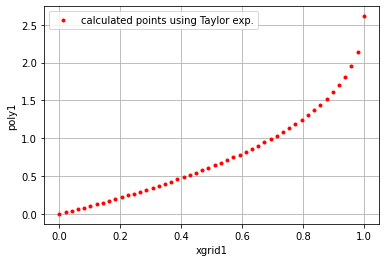

In [16]:
import matplotlib.pyplot as plt
import numpy as np
fig,ax=plt.subplots(1,1)
ax.plot(xgrid1,poly1,'.r',label='calculated points using Taylor exp.')
ax.set_xlabel('xgrid1')
ax.set_ylabel('poly1')

ax.legend()
ax.grid('True')

# 1. Ahora te imaginas que tienes que calcular el polilogaritmo para 50000 puntos. ¿qué harás?

In [17]:
### su codigo aqui
xgrid1=np.linspace(0.0,1.0,50)

poly1=[]

for x in xgrid1:
    poly1.append(mpmath.polylog(3.0/2.0,x))

In [18]:
datos_x = np.linspace(0,1,50000)

poly_int1 = interp1d(xgrid1, poly1, kind='cubic')


In [19]:
tiempo1 = time.time()

datos_y = poly_int1(datos_x)

tiempo2 = time.time()

In [20]:
print (f"Esta operacion tomo : {(tiempo2 - tiempo1):.2f} segundos")

Esta operacion tomo : 0.00 segundos


# 2. Cree una función llamada `poly_interp()` que devolverá un único punto interpolado de los 50 puntos originales

`p1=poly_interp(x1)`

In [21]:
### su codigo aqui
xgrid1=np.linspace(0.0,1.0,50)

poly1=[]
for x in xgrid1:
    poly1.append(mpmath.polylog(3.0/2.0,x))


In [22]:
#Función que me devuelve un punto interpolado
def poly_interp(b):

  poly_int = interp1d(xgrid1, poly1, kind='quadratic')

  resultado = poly_int(b)

  return resultado

In [23]:
poly_interp(0.22)

array(0.23950933)

# Criterias:

```
# Exercise 1 (max 4p):
#   f_cost + plot (max: 1.5p):                   1.5p   
#   stating for which c no roots (max: 0.5p):    0.5p 
#   left roots + plot (max: 1.0p):               1.0p 
#   right roots + plot (max: 1.0p):              1.0p 

# Exercise 2 (max 4p):
#   loading data + plot (max: 2.0p):             2.0p   
#   interpolating + plot (max. 2.0p):            2.0p 


# Exercise 3 (max 2p):
#   interpolation of polylog (max: 1.0p):        1.0p   
#   func to interp a point (max: 1.0p):          1.0p   

# TOTAL:                                         10.0p (out of 10p) 

```    